# Car Fuel Consumption

## データセットの確認

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as  sns

### データセットの読込み

CSVファイルは小数点のカンマ -> ピリオド変換のやり方がわからないためExcelのデータを読込む。

In [2]:
# Excelファイルの読込み
df = pd.read_excel('./input/measurements2.xlsx')

In [3]:
# レコード数確認
len(df)

388

In [4]:
# データの概要
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null float64
consume          388 non-null float64
speed            388 non-null int64
temp_inside      376 non-null float64
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null float64
refill gas       13 non-null object
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


#### 欠損値の補完

temp_insideに若干数の欠損値があるため、平均or中央値or最頻値で補完する。  
specials、refill liters、refill gasは欠損値が多すぎるため諦める。

In [5]:
# データの概要確認
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [6]:
# temp_insideの75%は２２℃近辺なので平均値の約21.9℃で欠損値を補完する。
df_copy = df.copy()
df_copy.temp_inside = df_copy.temp_inside.fillna(df_copy.temp_inside.mean())

In [7]:
# 補完後の確認
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null float64
consume          388 non-null float64
speed            388 non-null int64
temp_inside      388 non-null float64
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null float64
refill gas       13 non-null object
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


### gas_typeごとのデータ分離

下記のように置き換えた後、gas_typeごとのデータに分離する。

- E10 → 1
- SP98 → 2

In [8]:
# 置き換え前
df_gastype_replace = df_copy.copy()
df_gastype_replace.groupby('gas_type').size()

gas_type
E10     160
SP98    228
dtype: int64

In [9]:
# ガスの種類を二値で判別（E10=1,SP98=2）
df_gastype_replace = df_gastype_replace.replace("E10",1)
df_gastype_replace = df_gastype_replace.replace("SP98",2)

In [10]:
# 置き換え後
df_gastype_replace.groupby('gas_type').size()

gas_type
1    160
2    228
dtype: int64

In [11]:
# gas_typeごとのデータに分離
E10 = df_gastype_replace[df_gastype_replace.gas_type == 1][["distance","consume","speed","temp_inside","temp_outside","rain","sun","AC"]].copy()
SP98 = df_gastype_replace[df_gastype_replace.gas_type == 2][["distance","consume","speed","temp_inside","temp_outside","rain","sun","AC"]].copy()

In [12]:
E10.describe()

,distance,consume,speed,temp_inside,temp_outside,rain,sun,AC
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,21.096250,4.931250,43.506250,21.917429,10.118750,0.100000,0.075000,0.043750
std,20.307234,0.900956,14.077949,0.653602,6.392185,0.300942,0.264218,0.205181
min,1.700000,3.700000,14.000000,21.000000,-5.000000,0.000000,0.000000,0.000000
25%,12.075000,4.400000,35.000000,21.500000,6.000000,0.000000,0.000000,0.000000
50%,15.400000,4.800000,42.000000,21.500000,9.000000,0.000000,0.000000,0.000000
75%,21.200000,5.300000,51.000000,22.500000,14.250000,0.000000,0.000000,0.000000
max,130.300000,10.800000,88.000000,25.000000,27.000000,1.000000,1.000000,1.000000


In [13]:
SP98.describe()

,distance,consume,speed,temp_inside,temp_outside,rain,sun,AC
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,18.639912,4.899123,40.820175,21.938007,12.228070,0.140351,0.087719,0.100877
std,24.179598,1.118408,13.170122,1.177840,7.271373,0.348115,0.283509,0.301829
min,1.300000,3.300000,16.000000,19.000000,-3.000000,0.000000,0.000000,0.000000
25%,11.800000,4.200000,32.000000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.150000,4.700000,39.500000,22.000000,11.000000,0.000000,0.000000,0.000000
75%,18.150000,5.225000,48.000000,22.000000,17.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


## データの相関関係確認（とりあえずE10に絞る）

In [14]:
# 相関係数(correlation)の算出
E10.corr()

,distance,consume,speed,temp_inside,temp_outside,rain,sun,AC
distance,1.000000,-0.172572,0.633082,0.160371,0.158903,-0.073315,0.027364,0.045776
consume,-0.172572,1.000000,-0.233318,-0.069697,-0.322918,0.248199,-0.160503,0.043591
speed,0.633082,-0.233318,1.000000,0.034690,0.091093,-0.001633,0.128376,0.125102
temp_inside,0.160371,-0.069697,0.034690,1.000000,0.412592,0.058231,0.324870,0.308495
temp_outside,0.158903,-0.322918,0.091093,0.412592,1.000000,-0.097756,0.236743,0.048762
rain,-0.073315,0.248199,-0.001633,0.058231,-0.097756,1.000000,-0.094916,0.336123
sun,0.027364,-0.160503,0.128376,0.324870,0.236743,-0.094916,1.000000,0.171118
AC,0.045776,0.043591,0.125102,0.308495,0.048762,0.336123,0.171118,1.000000


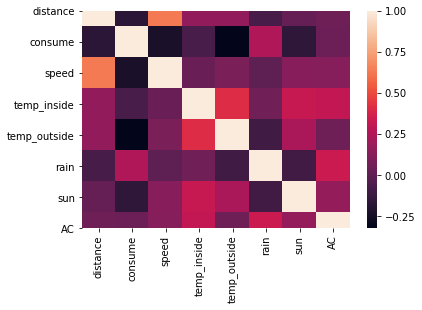

In [15]:
# 相関係数をヒートマップにして可視化
sns.heatmap(E10.corr())
plt.show()

燃費は$L/100km$だとイメージしにくいため$km/L$に変換する。

In [16]:
E10['consume2'] = 1 / (100 * E10['consume'])

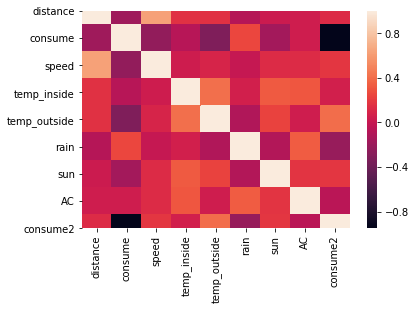

In [17]:
# 相関係数をヒートマップにして可視化
sns.heatmap(E10.corr())
plt.show()

In [18]:
E10.corr()

,distance,consume,speed,temp_inside,temp_outside,rain,sun,AC,consume2
distance,1.000000,-0.172572,0.633082,0.160371,0.158903,-0.073315,0.027364,0.045776,0.128499
consume,-0.172572,1.000000,-0.233318,-0.069697,-0.322918,0.248199,-0.160503,0.043591,-0.948085
speed,0.633082,-0.233318,1.000000,0.034690,0.091093,-0.001633,0.128376,0.125102,0.182789
temp_inside,0.160371,-0.069697,0.034690,1.000000,0.412592,0.058231,0.324870,0.308495,0.058469
temp_outside,0.158903,-0.322918,0.091093,0.412592,1.000000,-0.097756,0.236743,0.048762,0.403690
rain,-0.073315,0.248199,-0.001633,0.058231,-0.097756,1.000000,-0.094916,0.336123,-0.215400
sun,0.027364,-0.160503,0.128376,0.324870,0.236743,-0.094916,1.000000,0.171118,0.181016
AC,0.045776,0.043591,0.125102,0.308495,0.048762,0.336123,0.171118,1.000000,-0.052628
consume2,0.128499,-0.948085,0.182789,0.058469,0.403690,-0.215400,0.181016,-0.052628,1.000000


外気温との相関関係が強いのをどうにかしたいが、時間がないため、一旦線形回帰をかける。

## 説明変数

- distance(距離: km)
- speed(速度: km/h)
- temp_inside(車内気温: ℃)
- temp_outside(車外気温: ℃)

### 目的変数

- consume2(燃費: km/L)

### 扱い方が分からないので一旦除外

- rain(雨の日)
- sun(晴れの日)
- AC(エアコンOn/Off)

In [19]:
y_e10 = E10["consume2"].values

In [20]:
#X = pd.concat([E10.iloc[:, 0], E10.iloc[:, 2:]], axis=1)
X_e10 = E10[['distance', 'speed', 'temp_inside', 'temp_outside']].values

In [21]:
# データ系列数
M = X_e10.shape[0]
# 入力データ数
D = X_e10.shape[1]
# 繰り返し回数
iters = 3000
# 学習率
alpha = 0.0001
# 重みベクトルの初期化
W = np.ones(D)
# 評価結果記録用
history = np.zeros((0,2))

In [22]:
# 予測関数
def pred(x, w):
    return(x @ w)

In [23]:
# 繰り返しループ
for k in range(iters):
    yp = pred(X_e10, W)
    yd = yp - y_e10
    W = W - alpha * (X_e10.T @ yd) / M
    if(k % 100 == 0):
        loss = np.mean(yd ** 2) / 2
        history = np.vstack((history, np.array([k, loss])))
        print("iter = %d  loss = %f" % (k, loss))

iter = 0  loss = 5205.852746
iter = 100  loss = 7.335153
iter = 200  loss = 2.703484
iter = 300  loss = 0.999027
iter = 400  loss = 0.370213
iter = 500  loss = 0.137845
iter = 600  loss = 0.051738
iter = 700  loss = 0.019679
iter = 800  loss = 0.007647
iter = 900  loss = 0.003071
iter = 1000  loss = 0.001294
iter = 1100  loss = 0.000580
iter = 1200  loss = 0.000279
iter = 1300  loss = 0.000145
iter = 1400  loss = 0.000080
iter = 1500  loss = 0.000046
iter = 1600  loss = 0.000028
iter = 1700  loss = 0.000017
iter = 1800  loss = 0.000011
iter = 1900  loss = 0.000007
iter = 2000  loss = 0.000004
iter = 2100  loss = 0.000003
iter = 2200  loss = 0.000002
iter = 2300  loss = 0.000001
iter = 2400  loss = 0.000001
iter = 2500  loss = 0.000000
iter = 2600  loss = 0.000000
iter = 2700  loss = 0.000000
iter = 2800  loss = 0.000000
iter = 2900  loss = 0.000000


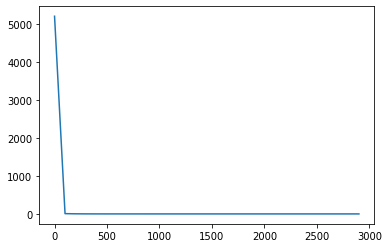

In [24]:
# 学習曲線の描画
plt.plot(history[:,0], history[:,1])
plt.show()

## Scikit-learnを用いて線形回帰

In [25]:
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数

In [26]:
# 線形回帰
regr = LinearRegression(fit_intercept=True)
regr.fit(X_e10, y_e10)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# 値を予測
y_pred = regr.predict(X_e10)

# MSEを計算
mse = mean_squared_error(y_e10, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y_e10, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 0.0
MAE = 0.0
RMSE = 0.0


In [30]:
y_pred.mean()

0.0020814378003480806

E10での燃費は0.00208 km/Lと解釈する？